In [1]:
#Importing necessary modules
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)

In [2]:
#Creating the Page Rank Function
def pageRank(linkMatrix, d) : #d is the damping factor
    n = linkMatrix.shape[0]
    M = (d * linkMatrix) + ((1-d)/n * np.ones([n, n]))
    
    r = 100 * np.ones(n) / n
    for i in np.arange(100):
        r = M @ r    
        
    return r

In [3]:
#Method to create a random probabilistic connection of nodes
def generate_internet(N):
    return np.around(np.random.random((N,N)), decimals=2)

In [4]:
#Generating a 5x5 internet connection with no damping
internet = generate_internet(5)
internet

array([[0.19, 0.2 , 0.8 , 0.06, 0.7 ],
       [0.98, 0.37, 0.29, 0.58, 0.13],
       [0.5 , 0.17, 0.11, 0.47, 0.37],
       [0.93, 0.02, 0.08, 1.  , 0.46],
       [0.18, 0.62, 0.91, 0.93, 0.51]])

In [5]:
#Applying the page rank algorithm to find the probability of each page
pageRank(internet, 1)

array([5.83709111e+37, 6.63424061e+37, 5.06498299e+37, 7.79928573e+37,
       9.40761978e+37])

In [6]:
#Computing Eigenvalues for the Computed Page Rank Matrix
eVals, eVecs = la.eig(internet) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([16.80066232, 19.09506536, 14.57833488, 22.44836744, 27.07757001])

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


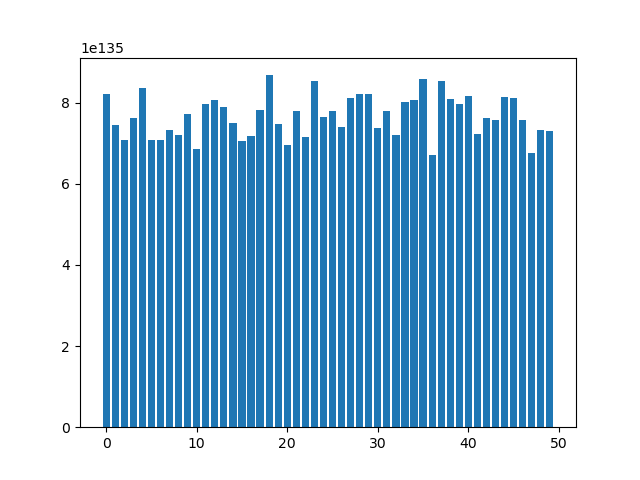

In [7]:
#Plotting the yielded values to visualize the Page Rank generated for internet of 50 connections
%pylab notebook
r = pageRank(generate_internet(50), 0.9)
plt.bar(arange(r.shape[0]), r);